In [3]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from IPython.display import display
from sklearn import metrics

In [4]:
#Solo hay que ingresar la variable df
#Genera dummies de todas las categoricas y elimina la primera para evitar combinaciones lineales
df = #insertar df
df_dummies = pd.get_dummies(df, drop_first= True)
df_dummies.head()

SyntaxError: invalid syntax (<ipython-input-4-f1f514cf647b>, line 3)

In [1]:
y = df_dummies[['price_usd_per_m2']]
X = df_dummies.drop(['price_usd_per_m2'],axis=1)
display(X.head(),y.head())

NameError: name 'df_caba_v1_dummies' is not defined

In [121]:
#Modelo regresion lineal

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state = 0)

model = LinearRegression()
model.fit(Xtrain,ytrain)

y_predict = model.predict(Xtest)

Train = Xtrain.join(ytrain)
Test = Xtest.join(ytest)
print('Train size: ', Train.shape)
print('Test size: ', Test.shape)
print('X test size: ', Xtest.shape)
print('Y test size: ', ytest.shape)
print('X train size: ', Xtrain.shape)
print('Y train size: ', ytrain.shape)

Train size:  (16239, 69)
Test size:  (5414, 69)
X test size:  (5414, 68)
Y test size:  (5414, 1)
X train size:  (16239, 68)
Y train size:  (16239, 1)


,property_type_PH,property_type_apartment,property_type_house,property_type_store,place_name_Abasto,place_name_Agronomía,place_name_Almagro,place_name_Balvanera,place_name_Barracas,place_name_Barrio Norte,...,place_name_Villa Pueyrredón,place_name_Villa Real,place_name_Villa Riachuelo,place_name_Villa Santa Rita,place_name_Villa Soldati,place_name_Villa Urquiza,place_name_Villa del Parque,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2
28201,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,63.0,59.0,2141.269841
44039,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,75.0,60.0,1866.666667
102498,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,231.0,186.0,2813.852814
79938,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,51.0,38.0,2156.862745
40277,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,49.0,49.0,1426.530612


In [122]:
y_predict

array([[ 1976.39549159],
       [ 2374.65535239],
       [ 2037.0779483 ],
       ..., 
       [ 1802.84613291],
       [ 2354.77213666],
       [ 3513.8458296 ]])

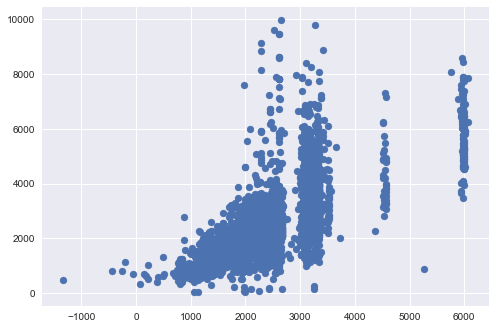

In [123]:
plt.scatter(y_predict,ytest)

In [124]:
print ('MAE:', metrics.mean_absolute_error(ytest, y_predict))
print ('MSE:', metrics.mean_squared_error(ytest, y_predict))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(ytest, y_predict)))
print ('R2:', metrics.r2_score(ytest, y_predict))

MAE: 567.929628974
MSE: 778524.453668
RMSE: 882.340327577
R2: 0.437392658089


In [2]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=53)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

NameError: name 'train_test_split' is not defined

In [129]:
# Generamos un grid de $\alpha$ para probar e instanciamos un particionador del Training Set 
# en K partes para realizar la validación cruzada

al_ridge = np.linspace(0.001, 3, 30)
al_lasso = np.linspace(0.001, 3, 30)
kf = KFold(n_splits=5, shuffle=True, random_state=12)

# Instanciamos los modelos

lm = LinearRegression()
lmRidgeCV = RidgeCV(alphas=al_ridge, cv=kf, normalize=False)
lmLassoCV = LassoCV(alphas=al_lasso, cv=kf, normalize=False)

In [1]:
# Hacemos los fits respectivos

lm.fit(X_train, y_train)
lmRidgeCV.fit(X_train, y_train)
lmLassoCV.fit(X_train, y_train)

NameError: name 'lm' is not defined

In [95]:
print('Alpha Ridge:',lmRidgeCV.alpha_,'\n'
      'Alpha LASSO:',lmLassoCV.alpha_,'\n')

Alpha Ridge: 1.60619063545 
Alpha LASSO: 0.101324414716 



In [96]:
# Calculamos el R2

print("Score Train Lineal:", lm.score(X_train, y_train),"\n"
      "Score Train Ridge:",  lmRidgeCV.score(X_train, y_train),"\n"
      "Score Train Lasso:",  lmLassoCV.score(X_train, y_train))

# Calculamos el MSE

lmpred_Tr = lm.predict(X_train)
lmRidgepred_Tr = lmRidgeCV.predict(X_train)
lmLassoepred_Tr = lmLassoCV.predict(X_train)

print("Train MSE lineal=", mean_squared_error(y_train,lmpred_Tr), "\n"
      "Train MSE Ridge=",  mean_squared_error(y_train,lmRidgepred_Tr), "\n"
      "Train MSE Lasso=",  mean_squared_error(y_train,lmLassoepred_Tr))

Score Train Lineal: 0.464491930122 
Score Train Ridge: 0.464442245531 
Score Train Lasso: 0.464371969921
Train MSE lineal= 723505.392625 
Train MSE Ridge= 723572.51966 
Train MSE Lasso= 723667.46647


In [97]:
# Hacemos las predicciones sobre la matriz de predictores del Test Set

lmpred_Te = lm.predict(X_test)
lmRidgepred_Te = lmRidgeCV.predict(X_test)
lmLassoepred_Te = lmLassoCV.predict(X_test)

# Testeo final del modelo sobre Test Set

print("Test Score lineal=", mean_squared_error(y_test,lmpred_Te), "\n"
      "Test Score Ridge=",  mean_squared_error(y_test,lmRidgepred_Te), "\n"
      "Test Score Lasso=",  mean_squared_error(y_test,lmLassoepred_Te))

Test Score lineal= 744469.533728 
Test Score Ridge= 744459.103395 
Test Score Lasso= 744689.811634
